In [1]:
import pandas as pd
#~~~~~~~~~~~~~~~~~~~~
import numpy as np

In [2]:
import os.path
#~~~~~~~~~~~~~~~~~~~~~~
from PIL import Image

In [3]:
from adjustText import adjust_text

In [4]:
import matplotlib.pyplot as plt
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import seaborn as sns
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

%matplotlib inline

In [5]:
plt.style.use(
              [
               'bmh',
               'dark_background'
              ]
             )

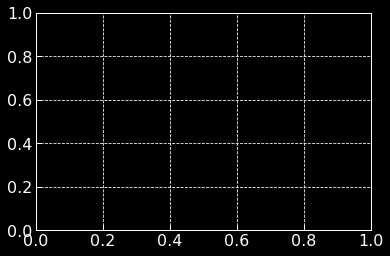

In [6]:
#sns.set_context('notebook')
#sns.set_context('paper')
#sns.set_context('talk')
#sns.set_context('poster')

sns.set_context(
                'paper',
                font_scale = 1.8
               )

fig, ax = plt.subplots()

# PART (1) — LOAD from CSV to DataFrame

In [7]:
data_folder_path = ('~/SBNation_Articles_Soccer_Data/' +
                     'Player_Comparisons/' +
                     'Oeuvrenalysis_Calhanoglu/' +
                     'DATA_playmakers_20_21/')
data_folder_path

'~/SBNation_Articles_Soccer_Data/Player_Comparisons/Oeuvrenalysis_Calhanoglu/DATA_playmakers_20_21/'

In [8]:
file_path = (data_folder_path +
             'Standard_Stats_20_21.csv')
file_path

'~/SBNation_Articles_Soccer_Data/Player_Comparisons/Oeuvrenalysis_Calhanoglu/DATA_playmakers_20_21/Standard_Stats_20_21.csv'

In [9]:
Standard_Stats_df = pd.read_csv(file_path)

In [10]:
Standard_Stats_df

,Player,Span,Nation,Pos,Squad,MP,Starts,Min,90s,Gls,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,Eriksen,2020-21,DEN,MF,Inter,26,17,1385,15.4,3,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,Luis Alberto,2020-21,ESP,MF,Lazio,34,33,2618,29.1,9,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,Çalhanoğlu,2020-21,TUR,MFFW,Milan,33,30,2614,29.0,4,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [11]:
columns_list = list(
                    Standard_Stats_df.columns
                   )
columns_list

['Player',
 'Span',
 'Nation',
 'Pos',
 'Squad',
 'MP',
 'Starts',
 'Min',
 '90s',
 'Gls',
 'Ast',
 'G-PK',
 'PK',
 'PKatt',
 'CrdY',
 'CrdR',
 'Gls_per_90',
 'Ast_per_90',
 'G+A_per_90',
 'G-PK_per_90',
 'G+A-PK_per_90',
 'xG',
 'npxG',
 'xA',
 'npxG+xA',
 'xG_per_90',
 'xA_per_90',
 'xG+xA_per_90',
 'npxG_per_90',
 'npxG+xA_per_90']

In [12]:
Stat_Numbers = Standard_Stats_df.loc[:,
                                     'MP':'npxG+xA_per_90'
                                    ]
Stat_Numbers

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,26,17,1385,15.4,3,0,3,0,0,1,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,34,33,2618,29.1,9,2,9,0,0,5,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,33,30,2614,29.0,4,9,3,1,1,4,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [13]:
#Stats_df = 

Stat_Numbers.insert(loc = 0,
                               column = 'Player',
                               value = Standard_Stats_df['Player']
                              )

In [14]:
Stat_Numbers

,Player,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,Eriksen,26,17,1385,15.4,3,0,3,0,0,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,Luis Alberto,34,33,2618,29.1,9,2,9,0,0,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,Çalhanoğlu,33,30,2614,29.0,4,9,3,1,1,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [15]:
Stats_df = Stat_Numbers

Stats_df

,Player,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
0,Eriksen,26,17,1385,15.4,3,0,3,0,0,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
1,Luis Alberto,34,33,2618,29.1,9,2,9,0,0,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
2,Çalhanoğlu,33,30,2614,29.0,4,9,3,1,1,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


In [16]:
Stats_df.set_index('Player',
                   inplace = True
                  )

Stats_df

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
Player,,,,,,,,,,,,,,,,,,,,,
Eriksen,26,17,1385,15.4,3,0,3,0,0,1,...,0.19,1.7,1.7,2.6,4.3,0.11,0.17,0.28,0.11,0.28
Luis Alberto,34,33,2618,29.1,9,2,9,0,0,5,...,0.38,5.5,5.3,8.2,13.5,0.19,0.28,0.47,0.18,0.46
Çalhanoğlu,33,30,2614,29.0,4,9,3,1,1,4,...,0.41,5.5,4.8,8.8,13.5,0.19,0.30,0.49,0.16,0.47


# PART (2) — identify RANKINGS per column

In [17]:
Stat_RANKS_df = (Stats_df.rank(ascending = 0,
                              #     '0' = 'False'
                               method = 'min'
                              )
                    .astype(int)
                   )

In [18]:
Stat_RANKS_df

,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,...,G+A-PK_per_90,xG,npxG,xA,npxG+xA,xG_per_90,xA_per_90,xG+xA_per_90,npxG_per_90,npxG+xA_per_90
Player,,,,,,,,,,,,,,,,,,,,,
Eriksen,3,3,3,3,3,3,2,2,2,3,...,3,3,3,3,3,3,3,3,3,3
Luis Alberto,1,1,1,1,1,2,1,2,2,1,...,2,1,1,2,1,1,2,2,1,2
Çalhanoğlu,2,2,2,2,2,1,2,1,1,2,...,1,1,2,1,1,1,1,1,2,1


# PART (3) — TRANSPOSE both OG and RANKS dataframes

In [19]:
Stats_Transposed = Stats_df.transpose()

Stats_Transposed

Player,Eriksen,Luis Alberto,Çalhanoğlu
MP,26.00,34.00,33.00
Starts,17.00,33.00,30.00
Min,1385.00,2618.00,2614.00
90s,15.40,29.10,29.00
Gls,3.00,9.00,4.00
Ast,0.00,2.00,9.00
G-PK,3.00,9.00,3.00
PK,0.00,0.00,1.00
PKatt,0.00,0.00,1.00
CrdY,1.00,5.00,4.00


In [20]:
Ranks_Transposed = Stat_RANKS_df.transpose()

Ranks_Transposed

Player,Eriksen,Luis Alberto,Çalhanoğlu
MP,3,1,2
Starts,3,1,2
Min,3,1,2
90s,3,1,2
Gls,3,1,2
Ast,3,2,1
G-PK,2,1,2
PK,2,2,1
PKatt,2,2,1
CrdY,3,1,2


array([[<AxesSubplot:xlabel='Frequency'>],
       [<AxesSubplot:xlabel='Frequency'>],
       [<AxesSubplot:xlabel='Frequency'>]], dtype=object)

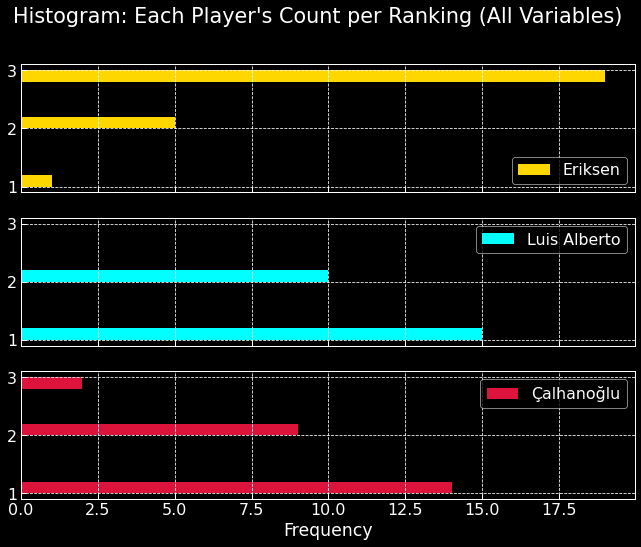

In [21]:
Ranks_Transposed.plot.hist(use_index = True,

                           subplots = True,
                           
                           orientation = 'horizontal',
                           
                           
                           figsize = (11,  # width (inches)
                                      8  # height (also inches)
                                     ),

                           layout = (3,  # number of "rows" for subplots
                                     1  # number of subplot "columns"
                                    ),

                           yticks = (# 0,
                                     1, 2, 3   #  ,
                                     # 4
                                    ),
                           
                           sharex = True,
                           sharey = True,

                           
                           color = ('gold',  #  Eriksen
                                    'aqua',   #  Luis Alberto
                                    'crimson'  #  Calhanoglu
                                   ),
                           
                           title = "Histogram: Each Player's Count per Ranking (All Variables)"
                          )

# PART (4) -- JOIN (not "merge" or "concat") STATS df + RANKS df

In [22]:
stats_and_ranks = Stats_Transposed.join(Ranks_Transposed,
                                        
                                        lsuffix = ' STATS',
                                        
                                        rsuffix = ' RANK'
                                       )
stats_and_ranks

Player,Eriksen STATS,Luis Alberto STATS,Çalhanoğlu STATS,Eriksen RANK,Luis Alberto RANK,Çalhanoğlu RANK
MP,26.00,34.00,33.00,3,1,2
Starts,17.00,33.00,30.00,3,1,2
Min,1385.00,2618.00,2614.00,3,1,2
90s,15.40,29.10,29.00,3,1,2
Gls,3.00,9.00,4.00,3,1,2
Ast,0.00,2.00,9.00,3,2,1
G-PK,3.00,9.00,3.00,2,1,2
PK,0.00,0.00,1.00,2,2,1
PKatt,0.00,0.00,1.00,2,2,1
CrdY,1.00,5.00,4.00,3,1,2


In [24]:
# ax = stats_and_ranks.plot.bar(y = 'Min',                            
#                               rot = 0)

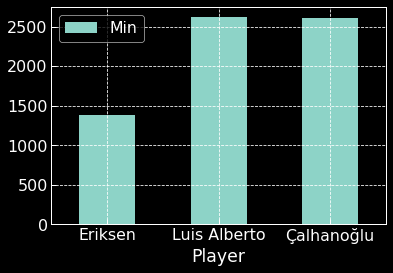

In [26]:
ax = Stats_df.plot.bar(y = 'Min',
                       rot = 0
                      )

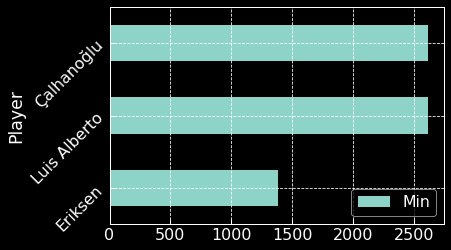

In [34]:
ax = Stats_df.plot.barh(y = 'Min',
                       rot = 45
                       )

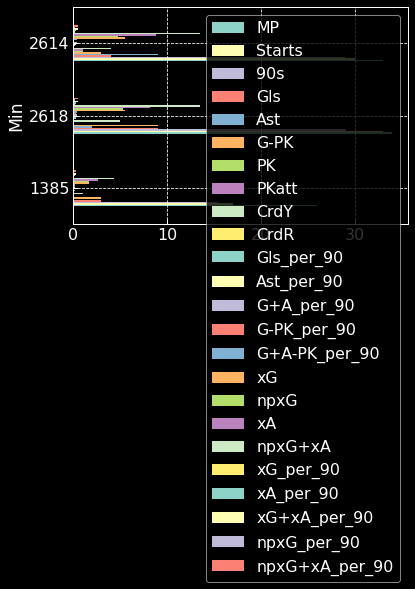

In [30]:
ax = Stats_df.plot.barh(x = 'Min'  # ,
#                        rot = 0
                       )

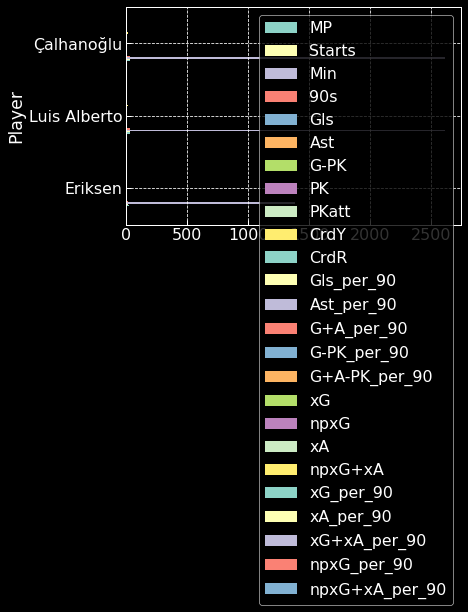

In [46]:
ax = Stats_df.plot.barh(
#                         y = 'Player',                      
#                         x = 'Min',
                        
#                         rot = 0,
                        
#                         color = {'Eriksen':'gold',
#                                  'Luis Alberto':'aqua',
#                                  'Calhanoglu':'crimson'}
                        
#                         use_index = True,
                        
#                        index = 'Player'
                       )

ValueError: Invalid RGBA argument: 'Eriksen'

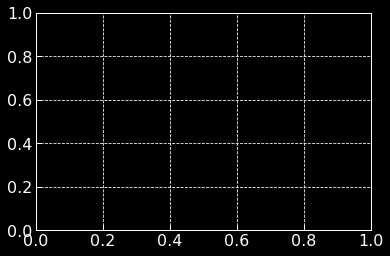

In [44]:
ax = Stats_df.plot.barh(y = 'Min',
                        
                        rot = 25,
                        
                        #
                        
                        color = {'Eriksen':'gold',
                                 'Luis Alberto':'aqua',
                                 'Calhanoglu':'crimson'}
                        
                        #
                       )

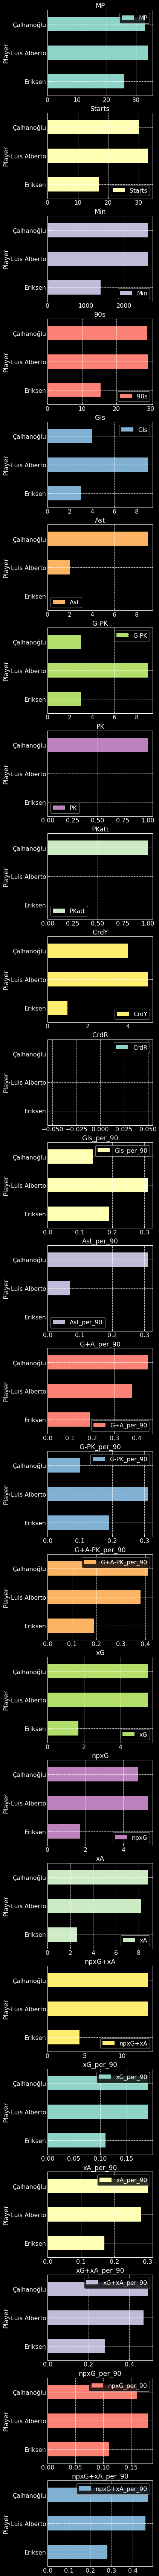

In [54]:
ax = Stats_df.plot.barh(subplots = True,
                        
#                         use_index = False
                        
                        layout = (25,1  # (rows,columns)
                                 ),
                        
                        figsize = (5, 125),
                        
                        sharex = False
                        
                        #
                        
                        #
                       )

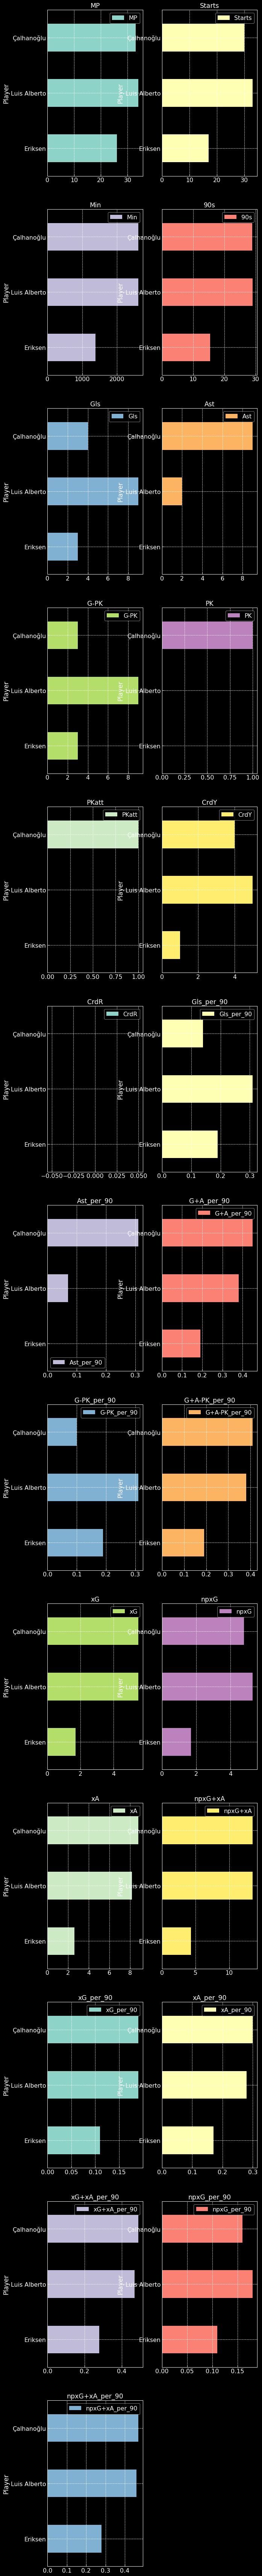

In [56]:
ax = Stats_df.plot.barh(subplots = True,
                        
#                         use_index = False
                        
                        layout = (13,2  # (rows,columns)
                                 ),
                        
                        figsize = (10, 125),
                        
                        sharex = False
                        
                        #
                        
                        #
                       )

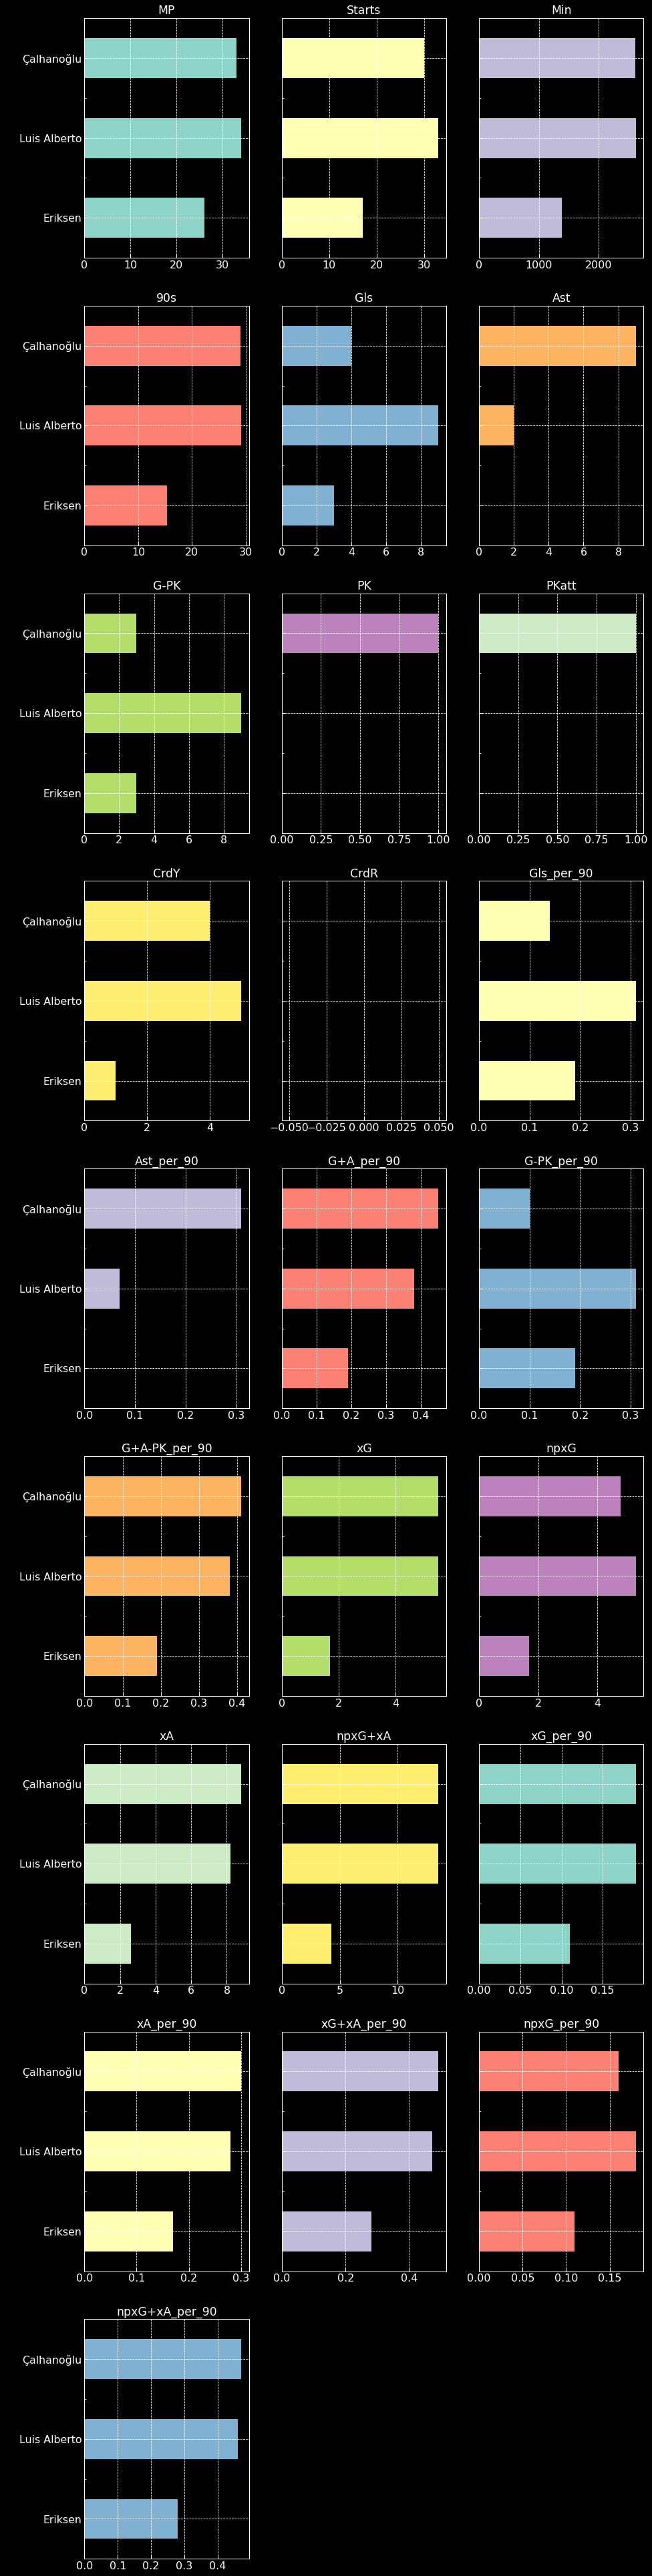

In [69]:
ax = Stats_df.plot.barh(subplots = True,
                        
                        layout = (9,  # (rows)
                                  3    # (columns)
                                 ),
                        
                        figsize = ( # 20,80
                                   15,70
                                  ),
                        
                        xlabel = " ",   # False,
                        
#                         ylabel = False,
                        
#                         rot = 90,
                        
                        #
                        
                        sharex = False,
                        
                        sharey = True,
                        
                        #
                        
                        legend = False
                        
                        #
                        
                        #
                       )

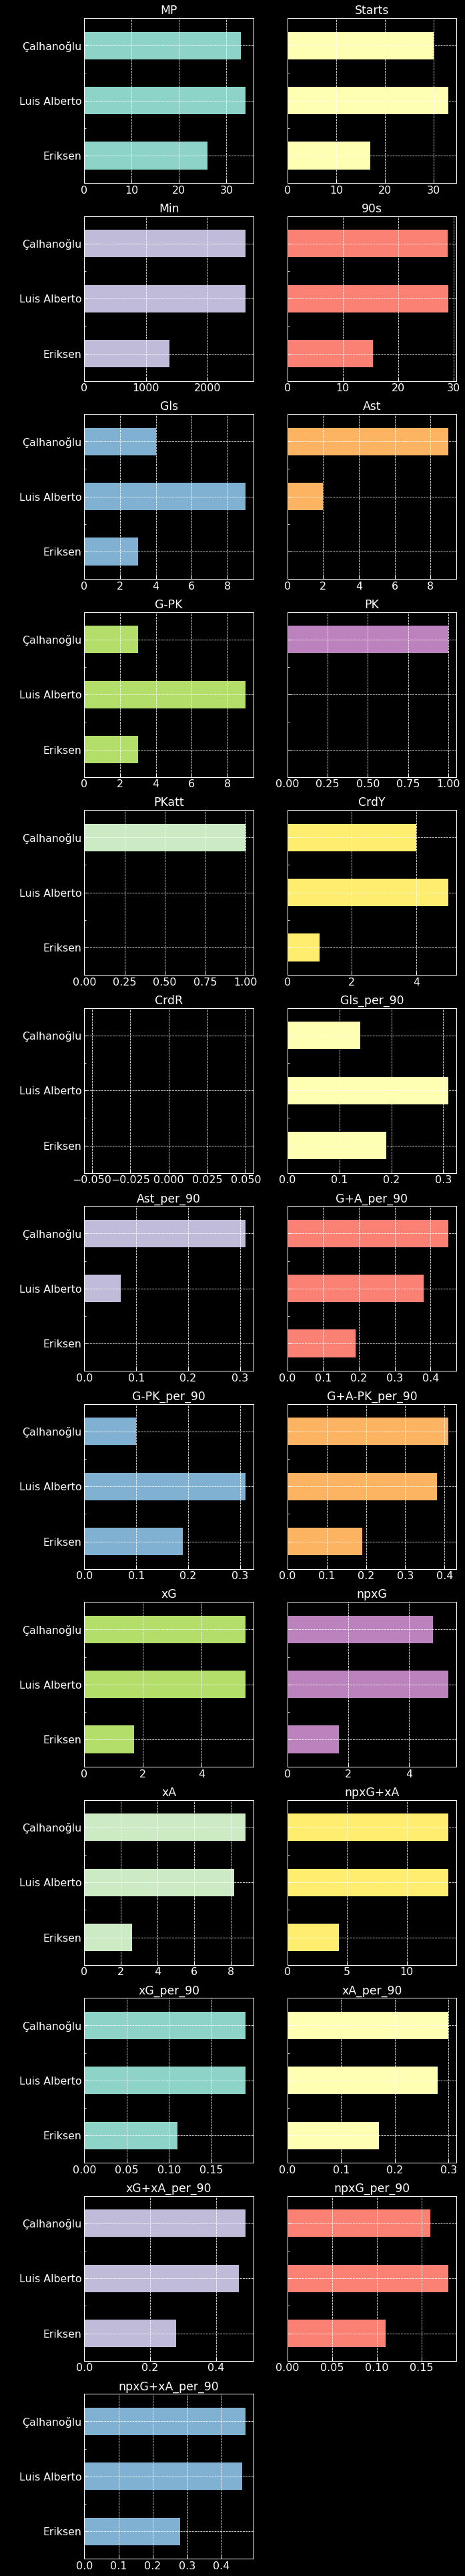

In [73]:
ax = Stats_df.plot.barh(subplots = True,
                        
                        layout = (13,  # (rows)
                                  2   # (columns)
                                 ),
                        
                        figsize = (10,  # width (inches)
                                   80  # height (inches)
                                  ),
                        
                        xlabel = " ",   # False,
                        
#                         ylabel = False,
                        
#                         rot = 90,
                        
                        #
                        
                        sharex = False,
                        
                        sharey = True,
                        
                        #
                        
                        legend = False
                        
                        #
                        
                        #
                       )

ax = sns.lmplot(
                x = #####   'Press',
    
                y = #####   'Press_Succ_Pct',
                
                data = #####   Defensive_Actions_df,

    
    
                fit_reg = True,
                #fit_reg = False,         # for *NO* regression line
                
                height = 13,              
                aspect = 1.3      #  dimension of x-axis (sets width)
               )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

x_col_min = #####   Defensive_Actions_df[   #####   'Press'].min()

x_col_max = #####   Defensive_Actions_df[   #####   'Press'].max()


y_col_min = #####   Defensive_Actions_df[   #####   'Press_Succ_Pct'].min()

y_col_max = #####   Defensive_Actions_df[   #####   'Press_Succ_Pct'].max()





#plt.xlim((x_col_min - 1), (x_col_max + 1))
#plt.ylim((y_col_min - 1), (y_col_max + 1))

plt.xlim(
         (x_col_min * 0.96),
         (x_col_max * 1.01)
        )
plt.ylim(
         (y_col_min * 0.97),
         (y_col_max * 1.03)
        )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -




# identify the source variables in MAIN TITLE:

plt.suptitle(
                       #####   'PRESSURES - TOTAL vs SUCCESS RATE     ',
             
             x = 0.475,
             y = 1.01,
             
             fontsize = 29,
             
             color = 'yellow'
            )




# identify the source time period in SUBTITLE:

plt.title(
          #####   subtitle_2_lines,
          

          loc = 'left',

          fontsize = 15,
          
          alpha = 0.9,
          
          style = 'italic',

          color = 'goldenrod'
         )




# attribute this work to "InterPool" specifically for S.O.M.

plt.title(
          #####   prod_by_and_for,


          loc = 'right',
          
          fontsize = 15,
          
          alpha = 0.7,
          
          style = 'italic',
          
          color = 'lightblue'
         )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.xlabel(
          #####   'PRESSURES - TOTAL',
    
           fontsize = 25,
    
           color = 'yellow'
          )

plt.ylabel(
          #####   'PRESSURES - SUCCESS RATE (%)',
    
           fontsize = 25,
    
           color = 'yellow'
          )

#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


# plt.figimage(
#              logos_flat_small,
             
#              980,   # 1090
#              5
#             )


#- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

point_labels = [
                plt.text(
                         #####   Defensive_Actions_df.          #####   Press[i],
                    
                         #####   Defensive_Actions_df.          #####   Press_Succ_Pct[i],
                         
                         #####   Defensive_Actions_df.          #####   Squad[i],
                    
                         fontsize = 18
                         
                        ) for i in range(
                                         len(
                                             #####   Defensive_Actions_df.Squad
                                            )
                                        )
               ]


adjust_text(
            point_labels,
    
            arrowprops = dict(
                              arrowstyle = '->',
                              color = 'red'
                             )
           )